In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# Load the data
data = pd.read_csv('/Users/eeevashen/Desktop/Apple_stock_data_6M.csv',low_memory=False)
# take out the Date column and Close/Last column
data = data[['Date','Close/Last']]
# make the whole dataframe upside down
data = data[::-1]
# seperate the Date column by month
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month

In [35]:
# print the first 5 rows of the data and the last 5 rows of the data
print(data.head())
print(data.tail())

          Date Close/Last  Month
124 2023-12-18    $195.89     12
123 2023-12-19    $196.94     12
122 2023-12-20    $194.83     12
121 2023-12-21    $194.68     12
120 2023-12-22    $193.60     12
        Date Close/Last  Month
4 2024-06-11    $207.15      6
3 2024-06-12    $213.07      6
2 2024-06-13    $214.24      6
1 2024-06-14    $212.49      6
0 2024-06-17    $216.67      6


In [36]:
data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')
# make the Close/Last column as float
data['Close/Last'] = data['Close/Last'].str.replace('$','').astype(float)
# make the Date column and Close/Last column as a tuple
tuple_data = list(zip(data['Date'],data['Close/Last']))

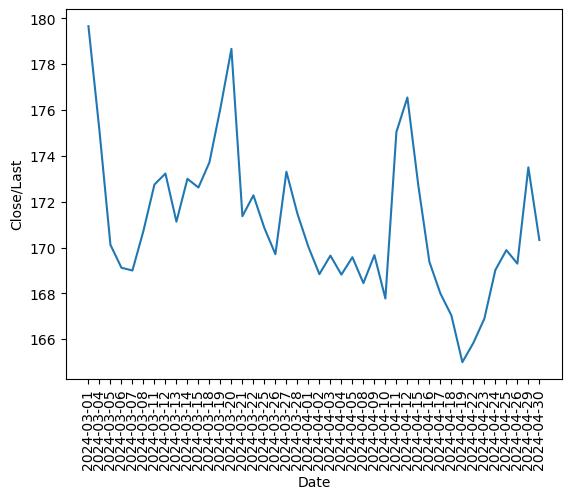

In [37]:
# pick month=4 5 6 data to plot
data = data[data['Month'].isin([3,4])]
# data = data[data['Month']==4]
# plot the data
plt.plot(data['Date'],data['Close/Last'])
plt.xlabel('Date')
plt.ylabel('Close/Last')
# make the x-axis label lilted
plt.xticks(rotation=90)
plt.show()

In [53]:
# check whether the data is contiousious changing the direction of the stock price
diff = []
direction = 1
turning_points = 0
turning_list = [0]
time_series = data['Close/Last'].values

for t in range(1, len(time_series)):
    if (time_series[t-1] - time_series[t]) * direction < 0:
        turning_points +=1
        turning_list.append(turning_points)
        direction = -direction
    else:
        turning_list.append(turning_points)
print(len(turning_list))
print(turning_list)

# check the turning_list have continous increasing number for continuous index
diff = np.diff(turning_list)
print(diff)


    





42
[0, 0, 0, 0, 0, 1, 1, 1, 2, 3, 4, 5, 5, 5, 6, 7, 8, 8, 9, 10, 10, 10, 11, 12, 13, 14, 15, 16, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 20, 21, 22]
[0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0
 0 1 1 1]


In [55]:
# check whether the data is contiousious changing the direction of the stock price
diff = []
direction = 1
turning_points = 0
turning_list = [0]
time_series = data['Close/Last'].values
threshold = 2

for t in range(1, len(time_series)):
    if (time_series[t-1] - time_series[t]) * direction < 0 and abs(time_series[t-1] - time_series[t]) < threshold:
        turning_points +=1
        turning_list.append(turning_points)
        direction = -direction
    else:
        turning_list.append(turning_points)
print(len(turning_list))
print(turning_list)

# check the turning_list have continous increasing number for continuous index
diff = np.diff(turning_list)
print(diff)
# print out the indexes of the more than two continious ones in diff


42
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 6, 7, 8, 9, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14]
[0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0
 0 1 0 0]


In [60]:
# Define the list
lst = [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]

# Initialize variables
sequences = []
start = None

# Iterate through the list
for i, num in enumerate(lst):
    if num == 1:
        if start is None:
            start = i  # Start of a new sequence of 1s
    else:
        if start is not None:
            if i - start > 2:  # End of the sequence and check its length
                sequences.append((start, i - 1))
            start = None  # Reset start

# Check if there was a sequence of 1s that ended at the last element
if start is not None and len(lst) - start > 2:
    sequences.append((start, len(lst) - 1))

# sequences means the index of the continuous 1s
print((sequences))

# take the average of the values of the sequences
values = data['Close/Last'].values
average = np.average(values[sequences[0][0]:sequences[0][1]])
print(average)




[(21, 26)]
169.06799999999998


In [61]:
# change the values of data['Close/Last'] to average if the index is in the sequences
for i in range(len(values)):
    if i in range(sequences[0][0],sequences[0][1]):
        values[i] = average
        

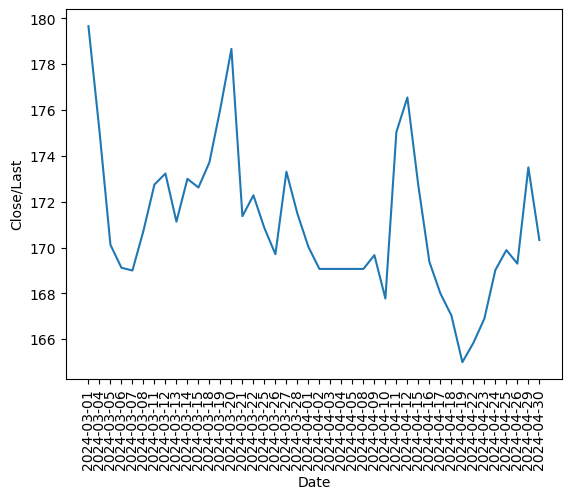

In [62]:
plt.plot(data['Date'],data['Close/Last'])
plt.xlabel('Date')
plt.ylabel('Close/Last')
# make the x-axis label lilted
plt.xticks(rotation=90)
plt.show()

In [26]:
# create a new column diff to store the difference between the Close/Last column
data['diff'] = data['Close/Last'].diff()
# print the first 5 rows of the data
print(data.head())

          Date  Close/Last  Month  diff
74  2024-03-01      179.66      3   NaN
73  2024-03-04      175.10      3 -4.56
72  2024-03-05      170.12      3 -4.98
71  2024-03-06      169.12      3 -1.00
70  2024-03-07      169.00      3 -0.12


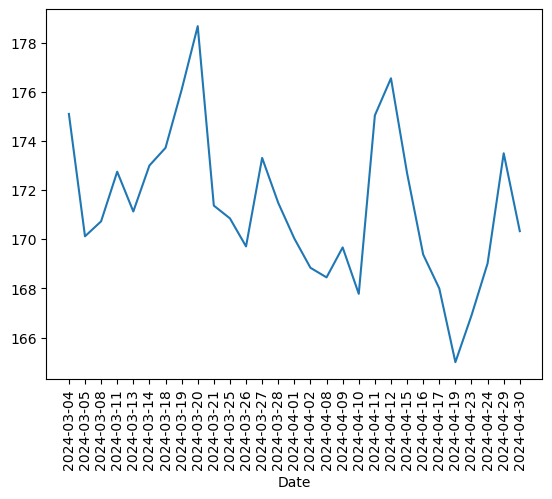

In [30]:
# delete the point that the difference is NaN or smaller than theshold
threshold = 1
data = data[abs(data['diff'])> threshold]
# print the plot of the data
plt.plot(data['Date'],data['Close/Last'])
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.show()

just delet the point within the threshod

avialable data will decrease